In [1]:
from sklearn.naive_bayes import GaussianNB

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score

In [5]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer 
from nltk.stem import WordNetLemmatizer

In [6]:
import re

In [50]:
from sklearn.preprocessing import LabelEncoder

In [95]:
data=pd.read_csv("C:/Users/abhin/ML Lab/Naive Bayes/IMDB Dataset.csv")

In [96]:
def clean(x):
    result = re.sub(r"[\W*]", " ",x)
    result=re.sub("https//:*"," ",result)
    result=re.sub("br","",result)
    result.lower()
    return result

In [97]:
data["review"]=data["review"].apply(clean)

In [98]:
def lemmatize(x):
    st=""
    tokenizer = word_tokenize(x)
    lemmatizer=WordNetLemmatizer()
    for w in tokenizer:
        st = st +" "+lemmatizer.lemmatize(w)
    return st
    

In [99]:
data["review"]=data["review"].apply(lemmatize)

In [100]:
data

,review,sentiment
0,One of the other reviewer ha mentioned that a...,positive
1,A wonderful little production The filming tec...,positive
2,I thought this wa a wonderful way to spend ti...,positive
3,Basically there s a family where a little boy...,negative
4,Petter Mattei s Love in the Time of Money is ...,positive
...,...,...
49995,I thought this movie did a down right good jo...,positive
49996,Bad plot bad dialogue bad acting idiotic dire...,negative
49997,I am a Catholic taught in parochial elementar...,negative
49998,I m going to have to disagree with the previo...,negative


In [101]:
x=data["review"]
Y_old=data["sentiment"]
le=LabelEncoder()
y=le.fit_transform(Y_old)

In [102]:
vec=CountVectorizer()
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)


In [103]:
vec.fit(x_train,y_train)

CountVectorizer()

In [104]:
new_x_train=vec.transform(x_train)

In [ ]:
clf=GaussianNB()
clf.fit(new_x_train.toarray(),y_train)

In [76]:
new_x_test=vec.transform(x_test)
vectors=new_x_test.toarray()

In [78]:
pred=clf.predict(vectors)

In [79]:
from sklearn.metrics import classification_report

In [80]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67      9961
           1       0.01      1.00      0.02        39

    accuracy                           0.50     10000
   macro avg       0.50      0.75      0.34     10000
weighted avg       1.00      0.50      0.66     10000



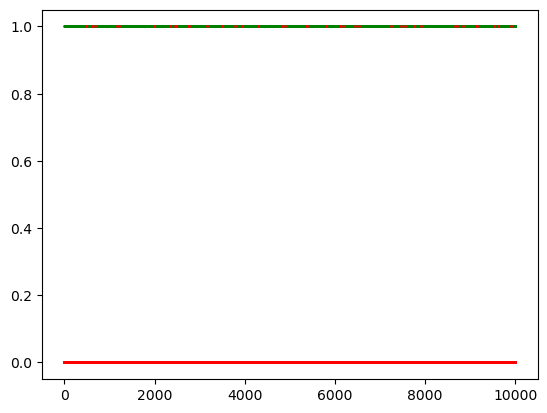

In [84]:
import matplotlib.pyplot as plt

plt.scatter(range(len(y_test)),y_test,s=1,color="green")
plt.scatter(range(len(pred)),pred,color="red",s=1)
plt.show()